In [16]:
class Value:
    def __init__(self, data):
        self.data = data 

    def __repr__(self):
        return f"Value(data={self.data})"

Python __repr__() function returns the object representation in string format. This method is called when repr() function is invoked on the object. If possible, the string returned should be a valid Python expression that can be used to reconstruct the object again.
  
[Read More](https://www.digitalocean.com/community/tutorials/python-str-repr-functions)

In [17]:
# Create a Value object with value 3.0
a = Value(3.0)
a

Value(data=3.0)

In [18]:
a = Value(2.0)
b = Value(-3.0)
a,b

(Value(data=2.0), Value(data=-3.0))

### Addition

In [19]:
a + b

# Internally it calls a.__add__(b), but current Value object does not have __add__ function
# So it returns an error

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

In [20]:
class Value:
    def __init__(self, data):
        self.data = data 

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):   # a + b = a.__add__(b)
        out = Value(self.data + other.data)
        return out

In [21]:
a = Value(2.0)
b = Value(-3.0)

a + b

Value(data=-1.0)

### Multiplication

In [22]:
class Value:
    def __init__(self, data):
        self.data = data 

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out 

    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out

In [23]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

# Original Equation 
d = a*b + c
d

Value(data=4.0)

### Maintaining the Children

We need to have pointers to understand what values produce other values, this will be done with the help of `_children_` variable which is a tuple.
  
To maintain it within the class we use the variable `_prev` which is its set, we use this for efficiency.

In [24]:
class Value:
    def __init__(self, data, _children=()):
        self.data = data 
        self._prev = set(_children)

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out 

    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out

Now when we perform calculations, we will store the children as well.

In [25]:
class Value:
    def __init__(self, data, _children=()):
        self.data = data 
        self._prev = set(_children)

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other))
        return out 

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other))
        return out

In [26]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

# Original Equation 
d = a*b + c
d

Value(data=4.0)

In [27]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

We now know what the chidren are for a value, to know the operation which created that value we create another variable `_op`

In [28]:
class Value:
    def __init__(self, data, _children=(), _op = ''):
        self.data = data 
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out 

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [29]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

# Original Equation 
d = a*b + c

d._op

'+'

### Visualization

#### graphviz conda installation steps

Ref - [Second Answer in Stackoverflow](https://stackoverflow.com/questions/33433274/anaconda-graphviz-cant-import-after-installation)
1. `conda install graphviz`
2. `conda install python-graphviz`
3. `conda install pydot`

In [54]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f}" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


In [55]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data 
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out 

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [56]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

e = a*b
e.label = 'e'

d = e + c
d.label = 'd'

d

Value(data=4.0)

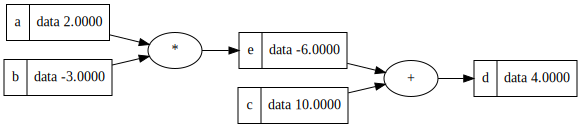

In [57]:
draw_dot(d)

## Calculating Gradients

In [60]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

e = a*b
e.label = 'e'

d = e + c
d.label = 'd'

f = Value(-2.0, label = 'f')
L = d * f # Graph output
L.label = 'L'

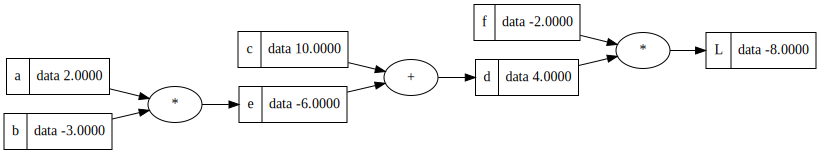

In [61]:
draw_dot(L)

This is the viusalization of the forward pass.  
For the backward pass we need to find the derivative of `L` w.r.t. `L`, `f`, `d` and so on
  
For initialization we set `grad = 0` which implies that every value does not affect the output.

In [68]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data 
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out 

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [69]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

e = a*b
e.label = 'e'

d = e + c
d.label = 'd'

f = Value(-2.0, label = 'f')
L = d * f # Graph output
L.label = 'L'

In [70]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()

  def build(v):
    if v not in nodes:
      nodes.add(v)

      for child in v._prev:
        edges.add((child, v))
        build(child)

  build(root)

  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)

  for n in nodes:
    uid = str(id(n))

    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


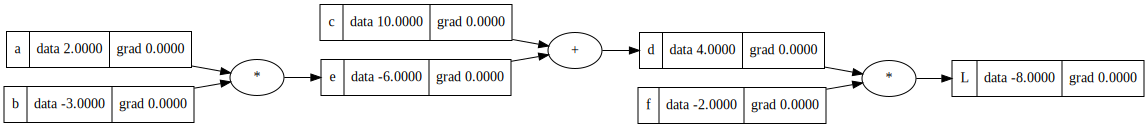

In [71]:
# Data of variables with their gradients (initialized to 0)

# Gradient represents the derivative of the output w.r.t that variable
draw_dot(L)

In [74]:
def lol():

    h = 0.0001

    # Original
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L1 = L.data # L is a Value object, we only need data

    # Derivative of L w.r.t L
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L2 = L.data + h

    print((L2 - L1)/h)

lol()

0.9999999999976694


So derivative of L w.r.t L is 1, `dL/dL = 1`, we can manually set it.

In [77]:
L.grad = 1.0

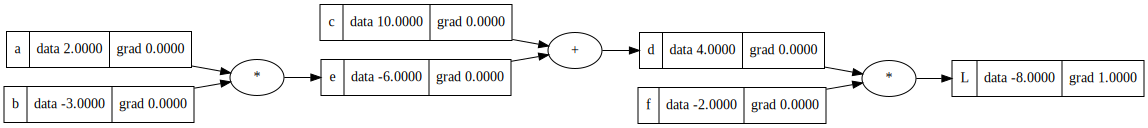

In [76]:
draw_dot(L)

**Manually Calculating the Gradients**

```
L = d * f

dL/dd = f (By chain rule)

OR

= [f(x+h) - f(h)] / h
= [((d + h)*f) - (d*f)] / h
= [d*f + h*f - d*f] / h 
= [h*f] / h
= f
```
  
So, by symmetry,
```
dL/df = d
```

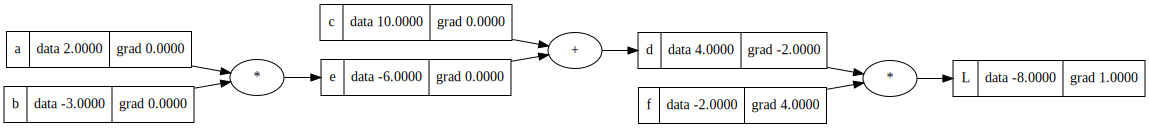

In [78]:
f.grad = 4 # Value of d
d.grad = -2.0 # Value of f

draw_dot(L)

In [84]:
# Checking above values

def lol():

    h = 0.0001

    # Original
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L1 = L.data # L is a Value object, we only need data

    # Derivative of L w.r.t f
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0 + h, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L2 = L.data

    print((L2 - L1)/h)

lol()

3.9999999999995595


In [86]:
# Checking above values

def lol():

    h = 0.0001

    # Original
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L1 = L.data # L is a Value object, we only need data

    # Derivative of L w.r.t d
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'
    d.data += h

    f = Value(-2.0 + h, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L2 = L.data

    print((L2 - L1)/h)

lol()

2.000100000003613
